<a href="https://colab.research.google.com/github/Ntinyari24/500-AI-Machine-learning-Deep-learning-Computer-vision-NLP-Projects-with-code/blob/main/telco_churn_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # **telco** customer churn prediction

# Importing libraries

In [ ]:
import os
import sys
import json
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report,roc_auc_score, roc_curve,PrecisionRecallDisplay, RocCurveDisplay

# mount drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# setup:project folder


In [ ]:
# project folder in google drive
project_folder = "/content/drive/MyDrive/telco"
os.makedirs(project_folder, exist_ok=True)
os.chdir(project_folder)
print ('working dir: ', os.getcwd())
print ("Folder contents: ",os.listdir())

working dir:  /content/drive/MyDrive/telco
Folder contents:  ['WA_Fn-UseC_-Telco-Customer-Churn.csv']


# load data


In [ ]:
data_path = os.path.join(project_folder, 'WA_Fn-UseC_-Telco-Customer-Churn.csv' )
data = pd.read_csv(data_path)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# shape
data.shape

(7043, 21)

# Data cleaning  & Quick sanity checks


In [ ]:
# create copy
df = data.copy()

# convert  target column to binary
assert 'Churn' in df.columns
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [ ]:
# drop unnecessary columns
if 'customerID' in df.columns:
  df.drop(columns=['customerID'], inplace=True)

data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# convert  target column to binary
assert 'Churn' in df.columns
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [ ]:
# total charges
if 'totalCharges' in df.columns:
  df['totalCharges'] = pd_to_numeric(df['totalCharges'], errors = 'coerce')
  # fill numeric NaNs with median
  df['totalCharges'].fillna(df['totalCharges'].median(), inplace=True)

In [ ]:
# identify features and dtypes
y = data['Churn']
X = data.drop(columns=['Churn'])

numerical_columns = X.select_dtypes(include=['number']).columns.tolist()
categorical_columns = X.select_dtypes(exclude=['number']).columns.tolist()

print(f"Numerical columns: {numerical_columns}")
print(f"Categorical columns: {categorical_columns}")

Numerical columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges']
Categorical columns: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges']


 # Split data

In [ ]:
# identify features and dtypes
y = df['Churn']
X = df.drop(columns=['Churn'])

numerical_columns = X.select_dtypes(include=['number']).columns.tolist()
categorical_columns = X.select_dtypes(exclude=['number']).columns.tolist()

print(f"Numerical columns: {numerical_columns}")
print(f"Categorical columns: {categorical_columns}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Numerical columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges']
Categorical columns: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges']


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5634, 20), (1409, 20), (5634,), (1409,))

# Data Preprocessing

In [ ]:
preprocess = ColumnTransformer(
    transformers =
    [
        ('num', StandardScaler(with_mean=False), numerical_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ],
    remainder = 'drop'
)

# Base Model

In [ ]:
# model A: Logistic Regression
logreg_clf = Pipeline(steps=[('preprocess', preprocess), ('classifier', LogisticRegression(max_iter= 1000, n_jobs= None, solver='liblinear'))])
logreg_clf.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  StandardScaler(with_mean=False),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['customerID', 'gender',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod',
                                                   'TotalCharges'])])),
                ('classifier',
                 LogisticRegression(max_iter=1000, solver='liblinear'))])

In [ ]:
# Model B
rf_clf = Pipeline(steps=[('preprocess', preprocess), ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])
rf_clf.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  StandardScaler(with_mean=False),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['customerID', 'gender',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod',
                                                   'TotalCharges'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

# Evaluate base models

In [ ]:
def evaluate(model, X_test, y_test, title:'model'):
  y_pred = model.predict(X_test)
  y_proba = model.predict_proba(X_test)[:, 1]
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  print(f"Model: {title}")
  print(f"Accuracy: {accuracy:.2f}")
  print(f"Precision: {precision:.2f}")
  print(f"Recall: {recall:.2f}")
  print("ROC-AUC: ", roc_auc_score(y_test, y_proba))
  print(classification_report(y_test, y_pred))
  print("\n")

  #confusion matrix
  cm = confusion_matrix(y_test, y_pred)
  print("Confusion Matrix:",cm)


  #ROC curve
  RocCurveDisplay.from_estimator(model, X_test, y_test)
  plt.title(f"ROC Curve for {title}")
  plt.show()

  #precision-recall
  PrecisionRecallDisplay.from_estimator(model, X_test, y_test)
  plt.title(f"Precision-Recall Curve for {title}")
  plt.show()
  print(cm)
  print("\n")

Model: Logistic Regression(base)
Accuracy: 0.83
Precision: 0.70
Recall: 0.59
ROC-AUC:  0.8612225304584555
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1036
           1       0.70      0.59      0.64       373

    accuracy                           0.83      1409
   macro avg       0.78      0.75      0.76      1409
weighted avg       0.82      0.83      0.82      1409



Confusion Matrix: [[942  94]
 [152 221]]


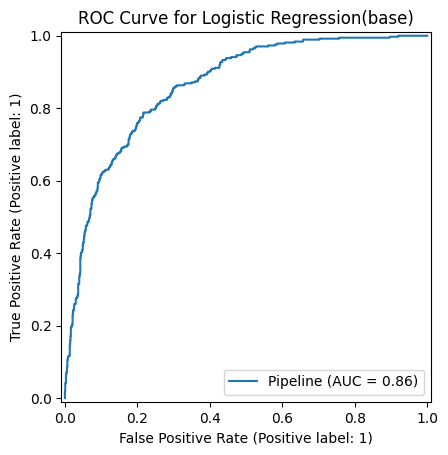

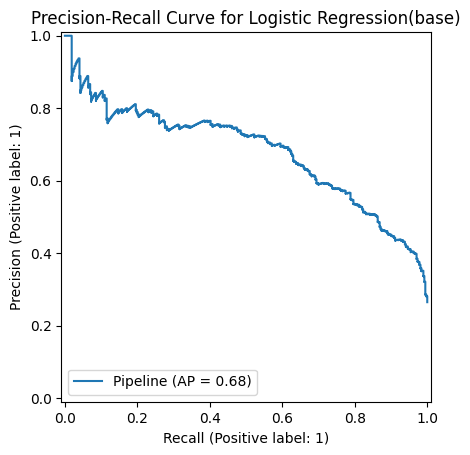

[[942  94]
 [152 221]]




In [ ]:
# LOGISTIC REGRESSION EVALUATION
evaluate(logreg_clf, X_test=X_test, y_test = y_test, title='Logistic Regression(base)')

Model: Random Forest Classifier(base)
Accuracy: 0.80
Precision: 0.67
Recall: 0.46
ROC-AUC:  0.8465457989586677
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1036
           1       0.67      0.46      0.55       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409



Confusion Matrix: [[950  86]
 [201 172]]


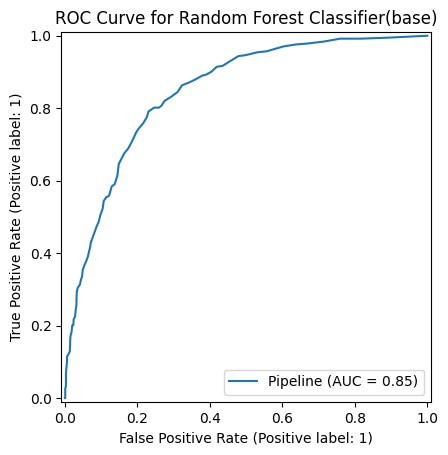

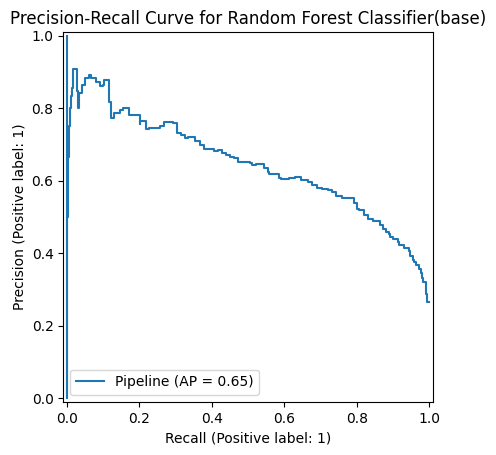

[[950  86]
 [201 172]]




In [ ]:
evaluate(rf_clf, X_test=X_test, y_test = y_test, title='Random Forest Classifier(base)')